In [8]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib

# Load cleaned data
df = pd.read_csv("underwriting_clean.csv")

X = df.drop("ClaimOccurred", axis=1)
y = df["ClaimOccurred"]

# Recreate same split as Milestone 2
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


In [10]:
gb_model = joblib.load("models/gb_model.pkl")


In [13]:
# Transform data using the trained preprocessing pipeline
X_bg_t = gb_model.named_steps["preprocess"].transform(X_bg)
X_test_t = gb_model.named_steps["preprocess"].transform(X_test)

# Convert to dense arrays (required for SHAP here)
X_bg_t = X_bg_t.toarray()
X_test_t = X_test_t.toarray()

In [ ]:
explainer = shap.TreeExplainer(
    gb_model.named_steps["model"],
    data=X_bg_t
)

shap_values = explainer.shap_values(X_test_t)


100%|===================| 169431/169504 [04:24<00:00]        

In [17]:
print(type(shap_values))
print(len(shap_values))
print(shap_values[1].shape)


<class 'numpy.ndarray'>
169504
(45,)


In [15]:
feature_names = gb_model.named_steps["preprocess"].get_feature_names_out()

In [20]:
print(explainer.expected_value)


-2.988653762726403


In [21]:
shap_exp = shap.Explanation(
    values=shap_values,              # already (n_samples, n_features)
    base_values=explainer.expected_value,  # SCALAR
    data=X_test_t,
    feature_names=feature_names
)

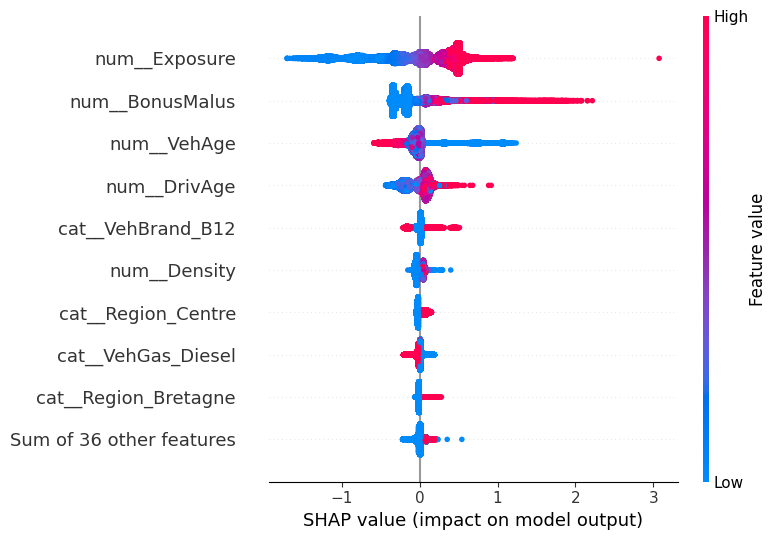

In [23]:
shap.plots.beeswarm(shap_exp, show=False)

import matplotlib.pyplot as plt
plt.tight_layout()
plt.savefig("reports/shap_global_summary.png", dpi=150)
plt.show()


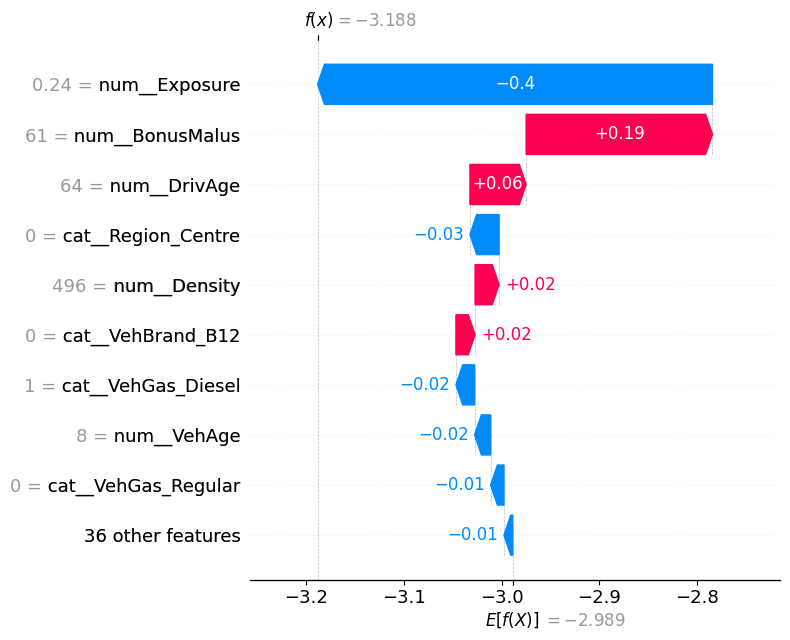

In [24]:
i = 0
shap.plots.waterfall(shap_exp[i], show=False)

plt.tight_layout()
plt.savefig("reports/shap_local_waterfall.png", dpi=150)
plt.show()